In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.integrate import trapz

## This is the Report for the 3rd Task of the Week Three Assignment.

All of the mandatory tasks are performed in the task3.f90 file. This Python notebook is only for plotting.

Guidelines for usage:

    - Run the task3.f90 file with your preferred settings.
    - Run this notebook to enjoy the visualization :-)

Necessary files:

    - task3.f90
    - task3_res.txt (can be reproduced with different settings)
    - task3_res_long.txt (output of task3.f90 with total_time > 1000)

In [2]:

def read_temperature_data(file_name='task3_res.txt'):
    """
    Read temperature data from a file and return it as a numpy array.
    Designed for usage with task3.f90 file.

    Parameters:
    file_name (str): The name of the file to read the temperature data from. Default is 'task3_res.txt'.

    Returns:
    numpy.ndarray: An array containing the time series of temperatures.
    """
    file_path = os.path.join(os.getcwd(), file_name)

    # Initialize a list to store the time series of temperatures
    temperature_series = []

    with open(file_path, 'r') as file:
        lines = file.readlines()
        
        # Skip the first line as it is the header
        for line in lines[1:]:
            # Split the line into values and convert them to floats
            temperatures = [float(value) for value in line.split()]
            # Append the list of temperatures for this time step to the temperature series
            temperature_series.append(temperatures)

    return np.array(temperature_series)


def plot_temperature_data(temperature_series):
    # Plotting each time step as a separate line in the graph
    for time_step, temperatures in enumerate(temperature_series):
        plt.plot(temperatures, label=f'Time {time_step+1}')

    plt.xlabel('Position')
    plt.ylabel('Temperature')
    plt.title('Temperature Distribution Over Time')
    #plt.legend()
    plt.show()

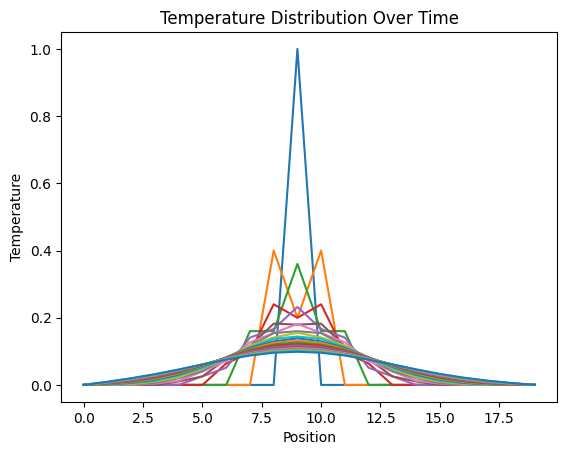

In [3]:
# Read Data
T = read_temperature_data()

# Call the function to plot the data
plot_temperature_data(T)

This Plot shows, how the temperature on the grid changes over time.

In [4]:
T_long = read_temperature_data('task3_res_long.txt')

integrals = []
for entry in T_long:
    integral = trapz(entry, dx=1)
    integrals.append(integral)





/tmp/ipykernel_6781/786697004.py:5: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  integral = trapz(entry, dx=1)


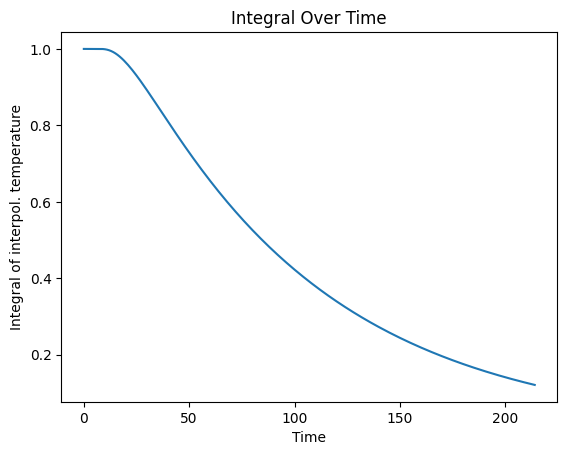

In [5]:
plt.plot(integrals)
plt.xlabel('Time')
plt.ylabel('Integral of interpol. temperature')
plt.title('Integral Over Time')
plt.show()


This plot represents exactly the expected behavior, it aims to represent the total energy within the system. To model the total energy of the system, I interpolated the temperature arrays and performed numerical integration. Given that the system is initially set with a temperature of 1 at the center of the array, the system's energy remains constant at the beginning. It takes approximately 10 time steps before the heat distribution reaches the edges of the simulation area. Since the boundary conditions are set to T = 0, the system loses energy with each time step, and the total energy of the system gradually approaches zero.